# SVM (Support Vector Machines)

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

## About the dataset
This dataset is used to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.

[Dataset source](https://archive.ics.uci.edu/ml/index.php).

In [2]:
df=pd.read_csv('processed.cleveland.data')
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


## Data pre-processing and selection

Replacing the column numbers with the following column names:
- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute

In [3]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


### Identifying Missing Data

In [4]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

The **ca** and **thal** columns have object data types. `object` datatypes are used when there are mixtures of things, like a mixture of numbers and letters.

In [5]:
df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

**ca** contains numbers (0.0, 3.0, 2.0 and 1.0) and questions marks (?). The numbers represent the number of blood vessels that we lit up by fluoroscopy and the question marks represent missing data.

In [6]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

**thal** also contains a mixture of numbers, representing the different diagnoses from the thalium heart scan, and question marks, which represent missing values.

### Dealing With Missing Data

In [7]:
len(df.loc[(df['ca']=='?') | (df['thal']=='?')])

6

Since only 6 rows have missing values

In [8]:
df.loc[(df['ca']=='?') | (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


Selecting all of the rows that do not contain question marks in either the **ca** or **thal** columns:

In [9]:
df_no_missing=df.loc[(df['ca']!='?') & (df['thal']!='?')]

In [10]:
df_no_missing['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0'], dtype=object)

In [11]:
df_no_missing['thal'].unique()

array(['3.0', '7.0', '6.0'], dtype=object)

`df_no_missing` does not contain any missing values. 

**ca** and **thal** still have the object data type. That's OK.

In [12]:
X=df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0


In [13]:
y=df_no_missing['hd'].copy()

The list bellow shows what each variable represents and the type of data (**float** or **categorical**) it should contain:

- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina,
  - 2 = atypical angina,
  - 3 = non-anginal pain,
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

In [14]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

**Scikit learn Support Vector Machines** natively support continuous data, like resting blood preasure (**restbp**) and maximum heart rate (**thalach**), they do not natively support categorical data, like chest pain (**cp**), which contains 4 different categories. 

 Implementing **One-Hot Encoding** for categorical variable

In [15]:
X_encoded=pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0


In [16]:
y.unique() 

array([2, 1, 0, 3, 4], dtype=int64)

**0 =** no heart disease and **1-4** are various degrees of heart disease. 

In [17]:
#Converting all numbers greater than 0 to 1.

y_greater_than_Zero= y>0
y[y_greater_than_Zero]=1
y.unique()

array([1, 0], dtype=int64)

#### Feature Scaling

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

## Modeling

In [19]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

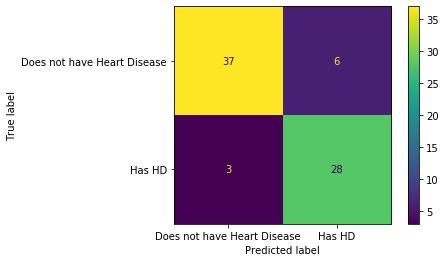

In [20]:
plot_confusion_matrix(clf_svm,X_test_scaled,y_test,display_labels=["Does not have Heart Disease","Has HD"])

## Optimizing Parameters with Cross Validation

In [21]:
param_grid=[{'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},]
optimal_params=GridSearchCV(SVC(),param_grid,cv=5,verbose=0)
optimal_params.fit(X_train_scaled,y_train)
optimal_params.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Ideal value for `C` is **10** and the ideal value for `gamma` is **0.001**.

In [22]:
clf_svm=SVC(random_state=42,C= 10, gamma= 0.001)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

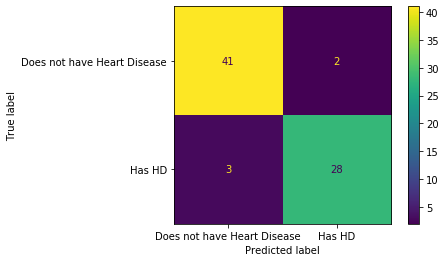

In [23]:
plot_confusion_matrix(clf_svm,X_test_scaled,y_test,display_labels=["Does not have Heart Disease","Has HD"])

## Visualization

Used PCA (Principal Component Analysis) to combine the 14 features into 2 orthogonal meta-features that can use as axes for a graph. 

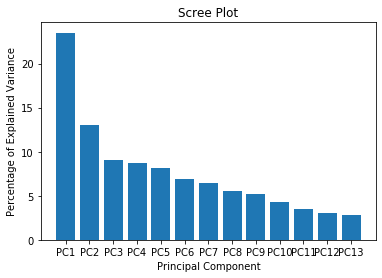

In [24]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

The scree plot shows that the first principal component, PC1, accounts for a relatively large amount of variation in the raw data, and this means that it will be a good candidate for the x-axis in the 2-dimensional graph. Since PC2 accounts for the next largest amount of variance, can be used for the y-axis.

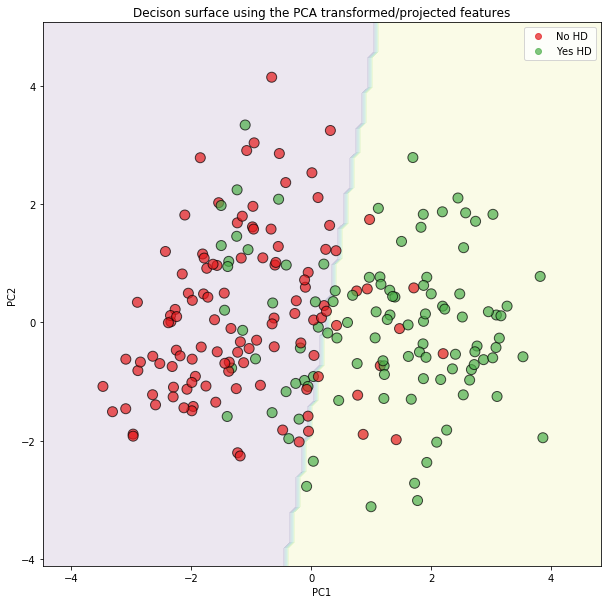

In [25]:
pc1 = X_train_pca[:, 0] 
pc2 = X_train_pca[:, 1]
#pc1 contains the x-axis coordinates of the data after PCA
#pc2 contains the y-axis coordinates of the data after PCA

clf_svm.fit(np.column_stack((pc1, pc2)), y_train)

#Creating a matrix of points that can use to show the decision regions.
x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1


xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1), np.arange(start=y_min, stop=y_max, step=0.1))

#Classifying every point in that matrix with the SVM. Points on one side of the classification boundary will get 0, and points on the other side will get 1
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

#Reshaping so that each classification (0 or 1) corresponds to a specific point in the matrix.
Z = Z.reshape(xx.shape)


fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx, yy, Z, alpha=0.1)

#Custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
 
scatter = ax.scatter(pc1, pc2, c=y_train, cmap=cmap, s=100, edgecolors='k', alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0],scatter.legend_elements()[1],loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
plt.show()